# Engenharia do Conhecimento 2023/2024

## Lab class TP03

# Model Evaluation and Selection

*Another Supervised Learning Tutorial by Andre Falcao + Cátia Pesquita + Sofia Teixeira + Nuno Garcia + Sara Silva (DI/FCUL 2021-2024)*

### Summary

1. Evaluating Regression Models
2. Evaluating Classification Models
3. Fitting and Validating Models
4. Model Selection




## 1. Evaluating Regression Models

A regression model (fitting a continuous dependent variable) usually requires a minimization of the prediction errors. These can be assessed generally with two different statistics:

1. A measure that quantifies the error in units of the dependent variable
2. A measure that identifies how much of the total variance is being explained by the model

These quantities, although related, are not the same, and convey different pieces of information.

Generally the measure of the error is the [Root Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html) (RMSE), which quantifies in average how much a model is failing its prediction:

$RMSE= \sqrt{\frac{\sum{(y_i-\hat{y_i})^2}}{N}}$,  where $y_i$ and $\hat{y_i}$ are expected (truth) and predicted (estimate) values, respectively, and $N$ is the number of samples. 

The variance explained is defined as the [Ratio of the Variance Explained](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html) (RVE):

$RVE= 1-\frac{Var(y-\hat{y})}{Var(y)}$

This gives a relative value of the quality of the model. A value close to 1.0 is a good model, while a value close to 0 is a model that is not giving good predictions. For linear regression, the RVE is equivalent to the familiar [$R^2$](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

Another way of evaluating the result of a model, which may actually be uncorrelated with the other mentioned methods, is to use the Pearson Correlation Coefficient for the predicted values against the expected values:

$\rho_{y,\hat{y}}=\frac{cov(y,\hat{y})}{\sigma_y \sigma_{\hat{y}}}$


Scikit-learn has these and many other metrics implemented and it is advisable to use the [Detailed help files](https://scikit-learn.org/stable/modules/model_evaluation.html).

## 1.2. Evaluating Regression Models

First let's fit a model, as on previous class
1. Get the data
2. Split the data into train and test
3. Fit the model to the training set
4. Evaluate the model on the test set

We are going to use the Diabetes data set as before and, for starters, we will use simple cross validation with a training and a test set.

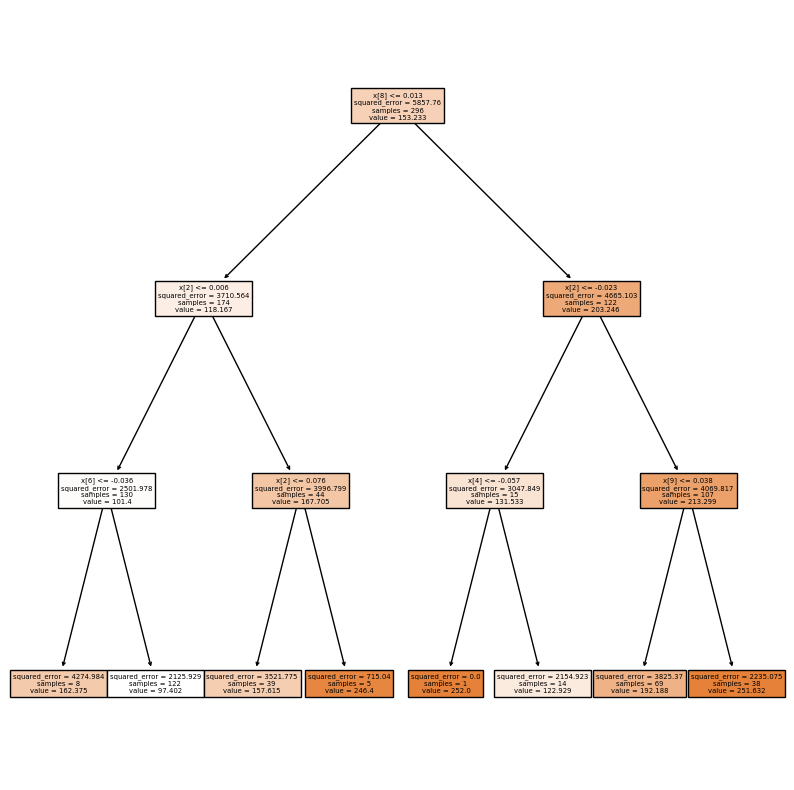

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X_diabetes, y_diabetes=load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.33, random_state=22)
mdl = DecisionTreeRegressor(max_depth=3, random_state=0) # No, DTs are not completely deterministic, hence the random_state
mdl.fit(X_train, y_train)

plt.figure(figsize=(10,10))
r=plot_tree(mdl, filled=True)
plt.show()

Now let's compute the basic statistics:
* RVE - Ratio of Variance Explained
* RMSE - Root Mean Squared Error
* Pearson Correlation score
* Mean absolute error
* Maximum error

In [4]:
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr

preds=mdl.predict(X_test)

print("The RVE is: ", explained_variance_score(y_test, preds))
print("The RMSE is: ", mean_squared_error(y_test, preds, squared=False))
      # 'squared' parameter is deprecated in 1.4 and will be removed in 1.6.
      # Use root_mean_squared_error instead to calculate the root mean squared error. 
corr, pval=pearsonr(y_test, preds)
print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))
print("The Maximum Error is is: ", max_error(y_test, preds))
print("The Mean Absolute Error is: ", mean_absolute_error(y_test, preds))


The RVE is:  0.39692740527256953
The RMSE is:  60.5090643992905
The Correlation Score is is: 0.6327 (p-value=1.063726e-17)

The Maximum Error is is:  167.6315789473684
The Mean Absolute Error is:  48.598043938700805


It is often valuable to have a graphical interpretation of the predicted vs expected results, as we can understand the types of errors made:


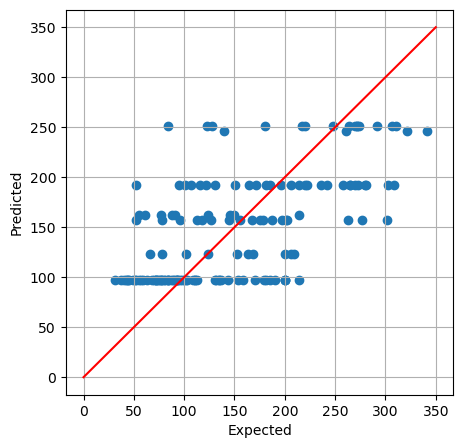

In [5]:
preds=mdl.predict(X_test)
plt.figure(figsize=(5,5))
plt.scatter(y_test, preds)
plt.plot((0,350), (0,350), c="r")
plt.xlabel("Expected")
plt.ylabel("Predicted")
plt.grid()
plt.show()

#### Exercises

1. What does the red line represent?
2. Do we have a good model? Can we make it better?  
    A. Build another Decision Tree Regressor (on the same data partitions), this time with maxdepth=10.  
    B. Plot its predictions and compare with the previous plot. Which predictions look better?  
    C. Compute the same statistics and compare them with the previous ones. Which model is better?

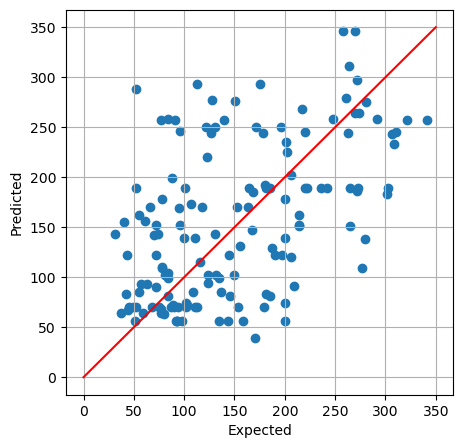

The RVE is:  0.03957348730806842
The RMSE is:  76.51599604786514
The Correlation Score is is: 0.5127 (p-value=3.693349e-11)

The Maximum Error is is:  236.0
The Mean Absolute Error is:  60.53334891974824


In [6]:
#1
#Explanation here
# Representa a reta que se tenta adaptar aos dados

#2.A
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.33, random_state=22)
mdl1 = DecisionTreeRegressor(max_depth=10, random_state=0)
mdl1.fit(X_train, y_train)

#2.B
preds1=mdl1.predict(X_test)
plt.figure(figsize=(5,5))
plt.scatter(y_test, preds1)
plt.plot((0,350), (0,350), c="r")
plt.xlabel("Expected")
plt.ylabel("Predicted")
plt.grid()
plt.show()
#A prediction anterior é melhor

#2.C
print("The RVE is: ", explained_variance_score(y_test, preds1))
print("The RMSE is: ", mean_squared_error(y_test, preds1, squared=False))
 
corr, pval=pearsonr(y_test, preds1)
print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))
print("The Maximum Error is is: ", max_error(y_test, preds1))
print("The Mean Absolute Error is: ", mean_absolute_error(y_test, preds1))
#A prediction anterior é melhor pois os resultados sao menores


## 2. Evaluating Classification Models

### 2.1 Binary classifiers



Data sets with a very small number of positives makes the Accuracy value illusory. The number of correct and important ratings is much lower, because the number of positives is much smaller than the number of negatives. This situation where the number of positives is much smaller than the number of negatives is the most frequent in real machine learning problems.

To solve this problem, a series of metrics were created that use the [following information](https://en.wikipedia.org/wiki/Confusion_matrix) taken from the confusion matrix:

* `TP` - True Positives - correctly classified positive values
* `TN` - True Negatives - correctly classified negative values
* `FP` - False Positives - negative values incorrectly classified as positive
* `FN` - False Negatives - positive values incorrectly classified as negative

The most common metrics are:

* $Precision =\frac{TP}{TP+FP}$  
  Fraction of true positives within all samples classified as positive.
  <br />
    
* $Recall =\frac{TP}{TP+FN}$  
  Fraction of true positives within all (truly) positive samples (also called Sensitivity).
  <br />
  
* $Specificity=\frac{TN}{TN+FP}$  
  Fraction of true negatives within all (truly) negative samples.  
  (Specificity is not so relevant for problems where the number of positives is much smaller than the number of negatives)  
  <br />

* $F1=2\frac{Precision\times Recall}{Precision+Recall}$  
  Harmonic mean between Precision and Recall.  
  (F1 is a good metric that gives an added value of the quality of a model)  
  <br />

One of the most reliable statistics it is the Matthews Correlation Coefficient (or Phi-Coefficient) that is able to produce a reliable result even if the data is heavily unbalanced:

* $MCC= \frac{TP.TN-FP.FN}{\sqrt{(TP+FP).(TP+FN).(TN+FP).(TN+FN)}}$  

Despite being very easy to calculate, scikit-learn already has all these metrics defined [and many more](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). 


### 2.2 Binary classifiers in practice

We are going to use the [breast cancer toy dataset of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)

In [7]:
from sklearn.datasets import load_breast_cancer
X_bc, y_bc=load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=22)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=22)

mdl = DecisionTreeClassifier(min_samples_leaf=5)
mdl.fit(X_train, y_train)
preds = mdl.predict(X_test)


In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
import pandas as pd

print("The Precision is: %7.4f" % precision_score(y_test, preds))
print("The Recall is: %7.4f" % recall_score(y_test, preds))
print("The F1 score is: %7.4f" % f1_score(y_test, preds))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_test, preds))
print()
print("This is the Confusion Matrix:")
pd.DataFrame(confusion_matrix(y_test, preds))
# rows is the expected (truth) classes; columns is the predicted classes

The Precision is:  0.9857
The Recall is:  0.9718
The F1 score is:  0.9787
The Matthews correlation coefficient is:  0.9444

This is the Confusion Matrix:


,0,1
0,42,1
1,2,69


#### The Classification Report

scikit-learn has a classification report facility that produces the F1, Precision and Recall statistics even for multiclass classification problems. It will produce these 3 statistics for each class (each handled as a binary classification problem) and a global score that is weighted according to the class priors



In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### 2.2. N-ary classifiers


For this type of classifiers we will use the: 
* Overall Accuracy
* Matthews Correlation Coefficient
* Confusion Matrix
* General Classification Report  

We will use the wine dataset.

In [11]:
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
X_w, y_w=load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_w, y_w, test_size=0.2, random_state=22)

mdl = DecisionTreeClassifier(min_samples_leaf=5)
mdl.fit(X_train, y_train)
preds=mdl.predict(X_test)
print("The Overall Accuracy is: %7.4f" % accuracy_score(y_test, preds))
print("The Matthews Correlation Coefficient is: %7.4f" % matthews_corrcoef(y_test, preds))
print()
print("This is the Confusion Matrix:")
pd.DataFrame(confusion_matrix(y_test, preds))

The Overall Accuracy is:  0.8889
The Matthews Correlation Coefficient is:  0.8350

This is the Confusion Matrix:


,0,1,2
0,9,0,0
1,2,13,1
2,0,1,10


The classification report presented below can naturally be used for many more classes (in this case, just 3)

In [12]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.93      0.81      0.87        16
           2       0.91      0.91      0.91        11

    accuracy                           0.89        36
   macro avg       0.89      0.91      0.89        36
weighted avg       0.90      0.89      0.89        36



#### Exercises

Pretend you have a faulty classifier that always predicts 0 when the true class is 1 (all other predictions like in 'preds')

  1. Present the accuracy, MCC, classification report and confusion matrix for this faulty classifier
  2. Take a good look at the precision and recall of class 0; remember what each metric represents and verify these values make sense for the predictions of the faulty classifier (**repeat step 2 until you learn this well**)
  3. Calculate and present the accuracy of each class (as if in a binary classification problem, one against the others). Compare with the previously calculated statistics. Do you notice any similarities?


In [13]:
#1
new_preds=preds
new_preds[y_test==1]=0

print(classification_report(y_test, new_preds))
print("Confusion matrix:")
print(pd.DataFrame(confusion_matrix(y_test, preds)))
print()

print("The Overall Accuracy is: %7.4f" % accuracy_score(y_test, new_preds))
print("The Matthews Correlation Coefficient is: %7.4f" % matthews_corrcoef(y_test, new_preds))

# Matthews Correlation Coefficient representa os dados com maior rigor.

              precision    recall  f1-score   support

           0       0.36      1.00      0.53         9
           1       0.00      0.00      0.00        16
           2       1.00      0.91      0.95        11

    accuracy                           0.53        36
   macro avg       0.45      0.64      0.49        36
weighted avg       0.40      0.53      0.42        36

Confusion matrix:
    0  1   2
0   9  0   0
1  16  0   0
2   0  1  10

The Overall Accuracy is:  0.5278
The Matthews Correlation Coefficient is:  0.4818


In [14]:
#3
print("Normalized confusion matrix:")
print(pd.DataFrame(confusion_matrix(y_test, preds, normalize='all')))

#Diagonal traduz-se na acuracy:
class_accuracies = confusion_matrix(y_test, preds, normalize='all').diagonal()

print("Class Accuracies:")
for i, acc in enumerate(class_accuracies):
    print(f"Accuracy for class {i}: {acc:.4f}")
    
#Comment here

Normalized confusion matrix:
          0         1         2
0  0.250000  0.000000  0.000000
1  0.444444  0.000000  0.000000
2  0.000000  0.027778  0.277778
Class Accuracies:
Accuracy for class 0: 0.2500
Accuracy for class 1: 0.0000
Accuracy for class 2: 0.2778


## 3. Fitting and validating models

In this class we will focus on fitting models to the training data and testing them on unseen data.


### 3.1.  Dataset preparation

As the classification datasets above are very easy, we will prepare the Diabetes for classification, considering positives all cases for which $Y \geq 250$

In [15]:
import numpy as np
yc_diabetes=np.array([int(i>=250) for i in y_diabetes])
vals, counts= np.unique(yc_diabetes, return_counts=True)
for v, c in zip(vals, counts):
    print(v, "--->", c)

0 ---> 377
1 ---> 65



### 3.2 Simple validation procedures

#### 3.2.1 Simple cross validation

Let's run the classification model with the basic binary classification statistics using simple cross validation:

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, yc_diabetes, test_size=0.2, random_state=3)
mdl = DecisionTreeClassifier(min_samples_leaf=5, random_state=2)
mdl.fit(X_train, y_train)
preds = mdl.predict(X_test)

print("The Precision is: %7.4f" % precision_score(y_test, preds))
print("The Recall is: %7.4f" % recall_score(y_test, preds))
print("The F1 score is: %7.4f" % f1_score(y_test, preds))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_test, preds))

The Precision is:  0.1538
The Recall is:  0.2500
The F1 score is:  0.1905
The Matthews correlation coefficient is:  0.0925


The results are definitely not brilliant. 

For some experimenting leeway, let's use the Decision Tree Classifier, but we need to make all variables categorical. We shall use the same code as before for going through all the columns and attribute values.

In [17]:
#first discretize the X matrix into terciles
data=load_diabetes()
cnames=data.feature_names
Xc_diabetes=np.empty(X_diabetes.shape,dtype="object")
Xc_diabetes[:,:]="Medium"
for i,cname in enumerate(cnames):
    q33, q67=np.quantile(X_diabetes[:,i], (0.33, 0.67))
    Xc_diabetes[X_diabetes[:,i]<q33, i]="Small"
    Xc_diabetes[X_diabetes[:,i]>q67, i]="Large"

df_diabetes=pd.DataFrame(Xc_diabetes)
df_diabetes.columns=cnames
df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,Large,Medium,Large,Medium,Small,Small,Small,Medium,Medium,Medium
1,Medium,Medium,Small,Medium,Medium,Medium,Large,Medium,Small,Small
2,Large,Medium,Large,Medium,Small,Small,Small,Medium,Medium,Small
3,Small,Medium,Medium,Small,Medium,Large,Small,Large,Large,Medium
4,Medium,Medium,Small,Medium,Medium,Medium,Medium,Medium,Small,Small
...,...,...,...,...,...,...,...,...,...,...
437,Large,Medium,Large,Large,Medium,Medium,Small,Medium,Large,Medium
438,Medium,Medium,Medium,Small,Large,Large,Small,Large,Medium,Large
439,Large,Medium,Medium,Medium,Small,Medium,Medium,Medium,Small,Medium
440,Small,Medium,Large,Medium,Medium,Medium,Small,Large,Large,Small


Now transform those qualitative values into separate columns. 

In [18]:
Xc_diabetes = pd.get_dummies(df_diabetes, drop_first=False).values
Xc_diabetes

array([[1, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 1, 0]], dtype=uint8)

Finally, build and evaluate a Decision Tree with this transformed dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(Xc_diabetes, yc_diabetes, test_size=0.2, random_state=3)
mdl = DecisionTreeClassifier(min_samples_leaf=5,random_state=2)
mdl.fit(X_train, y_train)
preds = mdl.predict(X_test)

print("The Precision is: %7.4f" % precision_score(y_test, preds))
print("The Recall is: %7.4f" % recall_score(y_test, preds))
print("The F1 score is: %7.4f" % f1_score(y_test, preds))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_test, preds))

The Precision is:  0.2308
The Recall is:  0.3750
The F1 score is:  0.2857
The Matthews correlation coefficient is:  0.2037


#### Exercise 

The `min_samples_leaf` hyperparameter might have a direct impact on the classification results. One solution to choose the best one is to try and verify many possibilities

1. Using simple cross validation investigate the best value for `min_samples_leaf` from 1 to 15 and select the best value according to the MCC metric
2. Do the same for `max_depth` (do not specify 'min_samples_leaf' and scikit-learn will use the default value of 2)


In [20]:
#1
X_train, X_test, y_train, y_test = train_test_split(Xc_diabetes, yc_diabetes, test_size=0.2, random_state=3);
array = [];
for i in range(1, 16):
    mdl1 = DecisionTreeClassifier(min_samples_leaf=i,random_state=2);
    mdl1.fit(X_train, y_train);
    preds = mdl1.predict(X_test);

    array.append(matthews_corrcoef(y_test, preds));

max = array[0];
index = 0;
for i in array:
    if (i > max):
        max = i;
        index = array.index(max);

print("The highest MCC is %7.4f" % max);
print("Criterion used: min samples leaf =", index + 1);

The highest MCC is  0.4881
Criterion used: min samples leaf = 8


In [21]:
#2
X_train, X_test, y_train, y_test = train_test_split(Xc_diabetes, yc_diabetes, test_size=0.2, random_state=3);
array = [];
for i in range(1, 16):
    mdl1 = DecisionTreeClassifier(max_depth=i,random_state=2);
    mdl1.fit(X_train, y_train);
    preds = mdl1.predict(X_test);

    array.append(matthews_corrcoef(y_test, preds));

max = array[0];
index = 0;
for i in array:
    if (i > max):
        max = i;
        index = array.index(max);

print("The highest MCC is %7.4f" % max);
print("Criterion used: max depth =", index + 1);


The highest MCC is  0.4667
Criterion used: max depth = 4


#### 3.1.2 N-Fold Cross validation

N-Fold cross validation is a more complex procedure that is actually made much more simple in scikit learn with the KFold method. This will create a number of disjunct splits as indexes that can be applied to the original data to make training and test sets for each of the k partitions. Prediction results are stored in separate arrays to be processed in the end.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

Although the k models produce a distribution of results, here we take the simpler approach of joining the predictions of all disjunct splits as if they were obtained by a single model. 

In [22]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=23) # do not forget to shuffle!
kf.get_n_splits(Xc_diabetes)
TRUTH_nfold=None
PREDS_nfold=None
for train_index, test_index in kf.split(Xc_diabetes):
    X_train, X_test = Xc_diabetes[train_index], Xc_diabetes[test_index]
    y_train, y_test = yc_diabetes[train_index], yc_diabetes[test_index]
    
    mdl = DecisionTreeClassifier()
    mdl.fit(X_train, y_train)
    preds = mdl.predict(X_test) 
    if TRUTH_nfold is None:
        PREDS_nfold=preds
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))

print("The Precision is: %7.4f" % precision_score(TRUTH_nfold, PREDS_nfold))
print("The Recall is: %7.4f" % recall_score(TRUTH_nfold, PREDS_nfold))
print("The F1 score is: %7.4f" % f1_score(TRUTH_nfold, PREDS_nfold))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(TRUTH_nfold, PREDS_nfold))

The Precision is:  0.2656
The Recall is:  0.2615
The F1 score is:  0.2636
The Matthews correlation coefficient is:  0.1378


#### 3.1.3. Leave-one-out cross validation

A procedure that can be used when the dataset is small is Leave-one-out (LOO). It consists of fitting one model to N-1 elements of the data and checking the model with the missing element, and reapeating for all data, this will involve creating N models which can be a time consuming process but eliminates any bias that may occur out of sampling problems

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html



In [23]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(Xc_diabetes)

TRUTH_loo=[]
PREDS_loo=[]

for train_index, test_index in loo.split(Xc_diabetes):
    X_train, X_test = Xc_diabetes[train_index], Xc_diabetes[test_index]
    y_train, y_test = yc_diabetes[train_index], yc_diabetes[test_index]
    
    mdl = DecisionTreeClassifier(max_depth=5)
    mdl.fit(X_train, y_train)
    pred = mdl.predict(X_test)
    PREDS_loo.append(pred)
    TRUTH_loo.append(y_test)
        
print("The Precision is: %7.4f" % precision_score(TRUTH_loo, PREDS_loo))
print("The Recall is: %7.4f" % recall_score(TRUTH_loo, PREDS_loo))
print("The F1 score is: %7.4f" % f1_score(TRUTH_loo, PREDS_loo))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(TRUTH_loo, PREDS_loo))

The Precision is:  0.4000
The Recall is:  0.3385
The F1 score is:  0.3667
The Matthews correlation coefficient is:  0.2692


## 4. Model Selection

KFold cross validation is able to evaluate a type of model, but will not produce a final one. To accomplish that, we will require a more complex procedure, that will evaluate, fit and validate any supervised model that we may throw at it. This is the standard procedure we will use:

1. First separate the dataset into a Training Set and an Independent Validation Set (IVS).
2. Use the Training Set for n-Fold Cross Validation
3. Evaluate the quality of the obtained predictions using the known statistics
4. If necessary (and possible), change the model variables or hyperparameters and repeat step 3 searching for a better model
5. Fit a new model with all the Training Set Data using the selected model
6. Use the IVS to assess the  model quality

Note that the IVS is the test set, also called unseen data, hold-out data set, among others.
The important thing is that this data (or any information retrieved from this data) is **NOT** used for building the model!

In [24]:
#1.First separate the dataset into a Training Set and an Independent Validation Set (IVS).
X_TRAIN, X_IVS, y_TRAIN, y_IVS = train_test_split(Xc_diabetes, yc_diabetes, test_size=0.25, random_state=123)


In [25]:
#2. Use the Training Set for n-Fold Cross Validation

kf = KFold(n_splits=5, shuffle=True, random_state=123)
TRUTH=None
PREDS=None
for train_index, test_index in kf.split(X_TRAIN):
    X_train, X_test = X_TRAIN[train_index], X_TRAIN[test_index]
    y_train, y_test = y_TRAIN[train_index], y_TRAIN[test_index]
    
    mdl = DecisionTreeClassifier(max_depth=3, random_state=0)
    mdl.fit(X_train, y_train)
    preds = mdl.predict(X_test)
    if TRUTH is None:
        PREDS=preds
        TRUTH=y_test
    else:
        PREDS=np.hstack((PREDS, preds))
        TRUTH=np.hstack((TRUTH, y_test))

In [26]:
#3. evaluate the resulting predictions using the known statistics
print("These are the cross validation statistics:")
print("The Precision is: %7.4f" % precision_score(TRUTH, PREDS))
print("The Recall is: %7.4f" % recall_score(TRUTH, PREDS))
print("The F1 score is: %7.4f" % f1_score(TRUTH, PREDS))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(TRUTH, PREDS))

These are the cross validation statistics:
The Precision is:  0.4390
The Recall is:  0.3529
The F1 score is:  0.3913
The Matthews correlation coefficient is:  0.2968


In [27]:
#5. Fit a new model with all the Training Set Data using the selected model
mdl = DecisionTreeClassifier(max_depth=3)
mdl.fit(X_TRAIN, y_TRAIN)

#6. Use the IVS to assess the  model quality
ivs_preds = mdl.predict(X_IVS) 

# DO NOT run these steps yet, do the Exercise instead


#### Exercise

1. Before doing Steps 5 and 6, investigate whether the DecisionTree model with `max_depth = 10` might be better, using KFold cross validation and comparing both model statistics (this is Step 4). Which model is the best? Justify your answer

2. Finally, do Steps 5 and 6 using the best parameters found (induce a new model on the entire training set; test it on the IVS). Compare the metrics obtained on the IVS (test set) to the ones previously obtained in cross validation. Did we correctly estimate the performance on unseen data?



In [28]:
#1

#first, 5 fold cross validation with the max_depth changed
kf = KFold(n_splits=5, shuffle=True, random_state=123)
TRUTH=None
PREDS=None
for train_index, test_index in kf.split(X_TRAIN):
    X_train, X_test = X_TRAIN[train_index], X_TRAIN[test_index]
    y_train, y_test = y_TRAIN[train_index], y_TRAIN[test_index]
    
    mdl = DecisionTreeClassifier(max_depth=10, random_state=0)
    mdl.fit(X_train, y_train)
    preds = mdl.predict(X_test)
    if TRUTH is None:
        PREDS=preds
        TRUTH=y_test
    else:
        PREDS=np.hstack((PREDS, preds))
        TRUTH=np.hstack((TRUTH, y_test))
    print("\n")
    print("These are the cross validation statistics:")
    print("The Precision is: %7.4f" % precision_score(y_test, preds))
    print("The Recall is: %7.4f" % recall_score(y_test, preds))
    print("The F1 score is: %7.4f" % f1_score(y_test, preds))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_test, preds))

    



# The previous model has better MCC and precision. A possible explaination for the decrease of accuracy when we increase the max depth is our 
# model is overfitting to the training data, which makes it to lose the capability to generalize.

#now compute and show the statistics
print("\n")
print("Result")
print("These are the cross validation statistics:")
print("The Precision is: %7.4f" % precision_score(TRUTH, PREDS))
print("The Recall is: %7.4f" % recall_score(TRUTH, PREDS))
print("The F1 score is: %7.4f" % f1_score(TRUTH, PREDS))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(TRUTH, PREDS))

#Comment here



These are the cross validation statistics:
The Precision is:  0.4545
The Recall is:  0.4167
The F1 score is:  0.4348
The Matthews correlation coefficient is:  0.3184


These are the cross validation statistics:
The Precision is:  0.4286
The Recall is:  0.2500
The F1 score is:  0.3158
The Matthews correlation coefficient is:  0.2204


These are the cross validation statistics:
The Precision is:  0.2500
The Recall is:  0.2000
The F1 score is:  0.2222
The Matthews correlation coefficient is:  0.1020


These are the cross validation statistics:
The Precision is:  0.3333
The Recall is:  0.5000
The F1 score is:  0.4000
The Matthews correlation coefficient is:  0.3064


These are the cross validation statistics:
The Precision is:  0.2857
The Recall is:  0.2222
The F1 score is:  0.2500
The Matthews correlation coefficient is:  0.1499


Result
These are the cross validation statistics:
The Precision is:  0.3556
The Recall is:  0.3137
The F1 score is:  0.3333
The Matthews correlation coefficie

In [29]:
#2
best_depth = 3  
best_m = DecisionTreeClassifier(max_depth=best_depth, random_state=0)

best_m.fit(X_TRAIN, y_TRAIN)
IVS_preds = best_m.predict(X_IVS)

print("Precision:", precision_score(y_IVS, IVS_preds))
print("Recall:", recall_score(y_IVS, IVS_preds))
print("F1 Score:", f1_score(y_IVS, IVS_preds))
print("MCC:", matthews_corrcoef(y_IVS, IVS_preds))

#Comment here

Precision: 0.3684210526315789
Recall: 0.5
F1 Score: 0.4242424242424242
MCC: 0.33166550203059675


## 5. A deeper look at model evaluation

We can use repeated simple cross validation runs for comparing models, by storing the results and comparing aggregate statistics

In this exercise we are not going to consider the IVS (test set), just a "bare bones" comparison of two classification models with simple cross validation.


### 5.1. Full model results

Make an histogram of the full model (unlimited max_depth) score results. The array scores1 gets the MCC of the full model


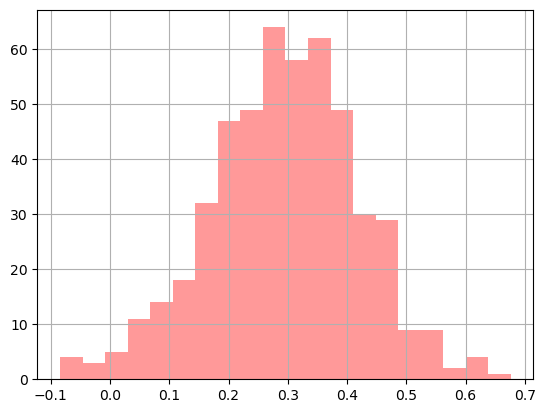

In [30]:
import matplotlib.pyplot as plt

scores1=[]
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X_diabetes, yc_diabetes, test_size=0.2)
    clf = DecisionTreeClassifier().fit(X_train, y_train)
    preds=clf.predict(X_test)
    scores1.append(matthews_corrcoef(y_test, preds))
plt.hist(scores1, color="red", alpha=.4, bins=20)
plt.grid()
plt.show()

### 5.2. Partial model results

Make an histogram of the scores of the simplified model with  `max_depth=3`. 

The array scores2 gets the MCC of this simplified model


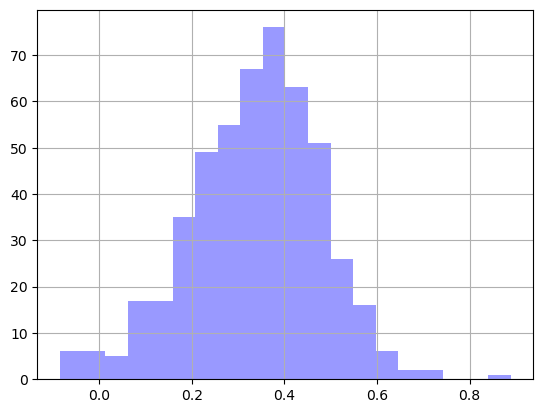

In [31]:
scores2=[]
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X_diabetes, yc_diabetes, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
    preds=clf.predict(X_test)
    scores2.append(matthews_corrcoef(y_test, preds))
plt.hist(scores2, color="blue", alpha=.4, bins=20)
plt.grid()
plt.show()

We can compare both histograms on the same plot, which will make it easier to ascertain the best result

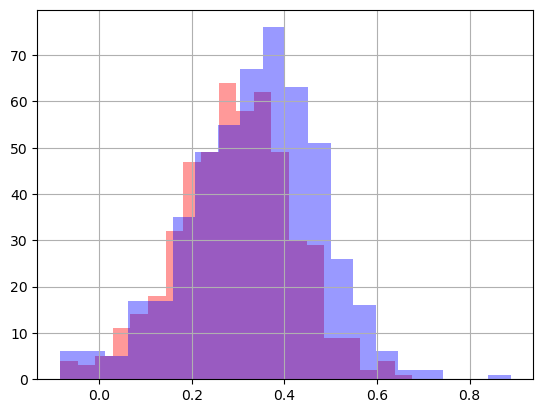

In [32]:
plt.hist(scores1, color="red", alpha=0.4, bins=20)
plt.hist(scores2, color="blue", alpha=0.4, bins=20)
plt.grid()
plt.show()

#### Exercises (do at home)

1. How likely is it that the second model is better than the first model? Give a quantitive answer to this question. **Suggestion:** compare each element of both arrays pairwise and determine how likely it is that Score1> Score2
2. Model the full process described above, including an IVS, fitting the best model with all the data, and computing the final results with the IVS (test set)

In [33]:
sum = 0
for i in range(500):
    if (scores2[i] < scores1[i]):
        sum+=1
print(sum/500)

199
